Churn quantifies the number of customers who have unsubscribed or cancelled their service contract. Customers turning their back to your service or product are no fun for any business. It is very expensive to win them back once lost, not even thinking that they will not do the best word to mouth marketing if unsatisfied. The most important question arises is how we can predict customer churn? The basic layer for predicting future customer churn is data from the past. We look at data from customers that already have churned (response) and their characteristics / behaviour (predictors) before the churn happened. By fitting a statistical model that relates the predictors to the response, we will try to predict the response for existing customers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data set and performing EDA

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Quantitative Explanatory Variables:
• CreditScore

• Age

• Tenure

• Balance

• NumOfProducts

• EstimatedSalary

Categorical Explanatory Variables:

• Surname

• Geography 

• Gender

• HasCrCard

• IsActiveMember

Response Variables: Exited

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


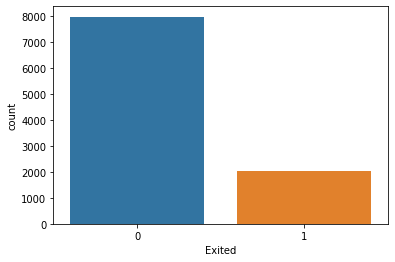

In [7]:
sns.countplot(df['Exited'])

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

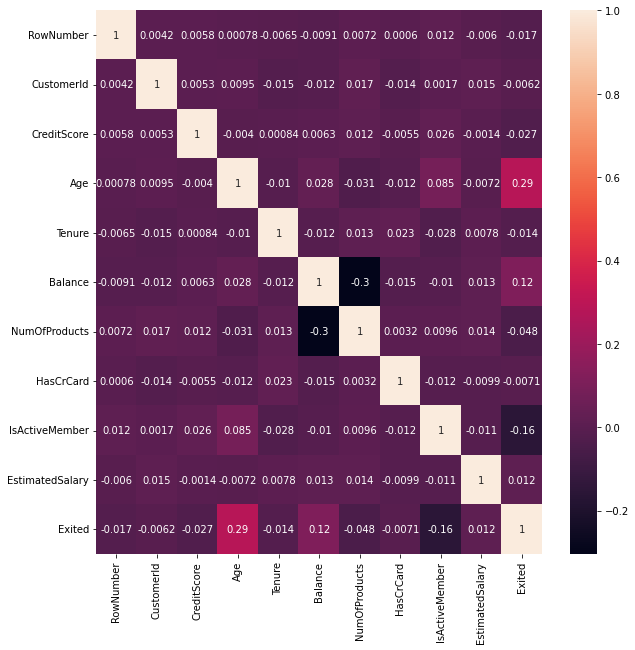

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


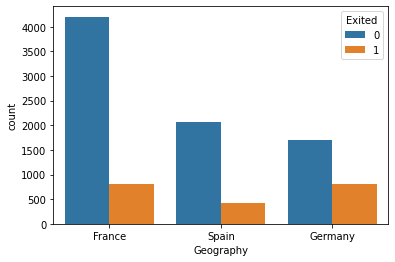

In [12]:
sns.countplot(df.Geography,hue=df.Exited)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


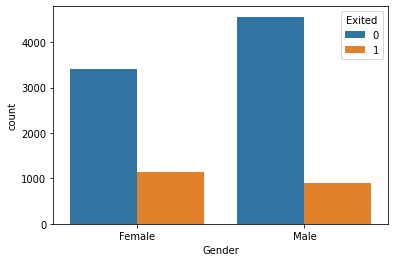

In [13]:
sns.countplot(df.Gender,hue=df.Exited)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


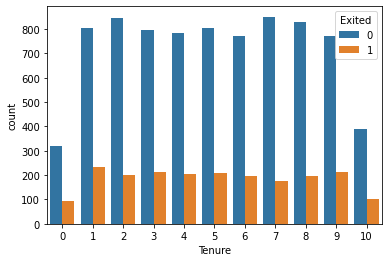

In [14]:
sns.countplot(df.Tenure,hue=df.Exited)

In [15]:
df.CreditScore.nunique()

460

In [16]:
df.NumOfProducts.nunique()

4

In [17]:
df.Surname.nunique()

2932

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


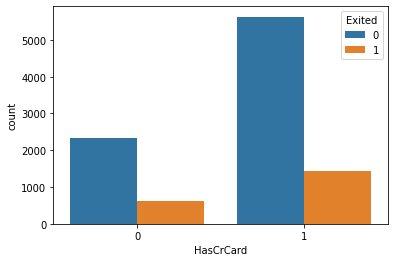

In [18]:
sns.countplot(df.HasCrCard,hue=df.Exited)

In [23]:
bank_data_numeric = df[["CreditScore", "Age", "Tenure", "Balance",
                               "NumOfProducts", "HasCrCard", "IsActiveMember",
                               "EstimatedSalary", "Exited"]]

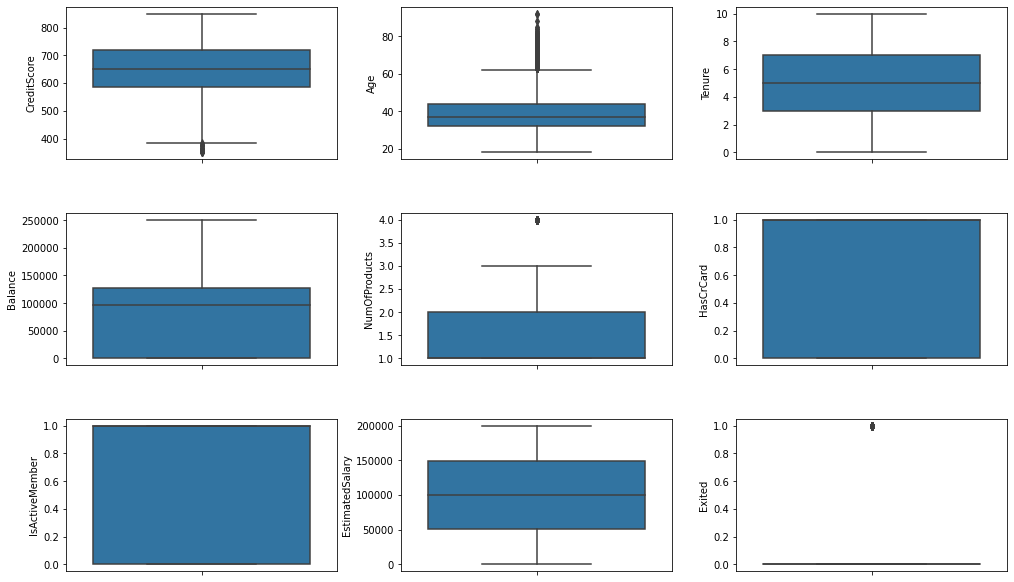

In [24]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (14, 8))
idx = 0
axs = axs.flatten()
for k, v in bank_data_numeric.items():
    sns.boxplot(y = k, data = bank_data_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

It could be seen that clients with credit score below 400 are considered outliers. People aged over 60 years are also deemed outliers. Extreme values are not found in "Tenure", "Balance", "HasCrCard", "IsActiveMember", and "EstimatedSalary". Those who left the bank are categorised as outliers (perhaps because of their insignificant number).

**Under Sampling**

In [25]:
count_class_0,count_class_1 = df.Exited.value_counts()
df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]

In [26]:
df_class_0.shape

(7963, 14)

In [27]:
df_class_1.shape

(2037, 14)

In [28]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(4074, 14)

In [29]:
print('Random under-sampling')
print(df_test_under.Exited.value_counts())

Random under-sampling
1    2037
0    2037
Name: Exited, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


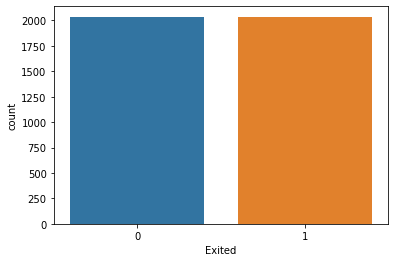

In [30]:
sns.countplot(df_test_under.Exited)

In [31]:
df_test_under.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2023,2024,15731890,Chukwukere,601,France,Male,41,1,123971.16,1,0,1,172814.99,0
1159,1160,15690664,Liang,729,Spain,Male,37,10,0.00,2,1,0,100862.54,0
1863,1864,15641183,Chin,731,Spain,Male,25,8,96950.21,1,1,0,97877.92,0
5109,5110,15576156,Abazu,710,Spain,Female,28,6,0.00,1,1,0,48426.98,0
6281,6282,15656921,Locke,850,France,Male,31,4,0.00,2,0,0,152298.28,0


In [32]:
a = pd.get_dummies(df_test_under['Gender'])

In [33]:
b = pd.get_dummies(df_test_under['Geography'])

In [34]:
df_test_under= pd.concat([a,b,df_test_under],axis=1,join='inner')

In [35]:
df_test_under.head()

,Female,Male,France,Germany,Spain,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2023,0,1,1,0,0,2024,15731890,Chukwukere,601,France,Male,41,1,123971.16,1,0,1,172814.99,0
1159,0,1,0,0,1,1160,15690664,Liang,729,Spain,Male,37,10,0.00,2,1,0,100862.54,0
1863,0,1,0,0,1,1864,15641183,Chin,731,Spain,Male,25,8,96950.21,1,1,0,97877.92,0
5109,1,0,0,0,1,5110,15576156,Abazu,710,Spain,Female,28,6,0.00,1,1,0,48426.98,0
6281,0,1,1,0,0,6282,15656921,Locke,850,France,Male,31,4,0.00,2,0,0,152298.28,0


In [36]:
df_test_under.drop(['Gender','RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [37]:
df_test_under.head()

,Female,Male,France,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2023,0,1,1,0,0,601,41,1,123971.16,1,0,1,172814.99,0
1159,0,1,0,0,1,729,37,10,0.00,2,1,0,100862.54,0
1863,0,1,0,0,1,731,25,8,96950.21,1,1,0,97877.92,0
5109,1,0,0,0,1,710,28,6,0.00,1,1,0,48426.98,0
6281,0,1,1,0,0,850,31,4,0.00,2,0,0,152298.28,0


In [38]:
x = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123,stratify=y)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [42]:
print(rf.feature_importances_)

[0.01200882 0.01227416 0.01301413 0.02522008 0.01070589 0.13441576
 0.26412022 0.0848504  0.13587144 0.11238229 0.01986992 0.03953241
 0.13573447]


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [44]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [45]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [46]:
scores

[0.6932515337423313,
 0.7325153374233129,
 0.7055214723926381,
 0.7128834355828221,
 0.7202453987730061,
 0.7656441717791411,
 0.7079754601226994,
 0.7239263803680982]

In [47]:
df1 = pd.DataFrame()
df1['Names'] = names
df1['Score'] = scores
df1

,Names,Score
0,Nearest Neighbors,0.693252
1,Linear SVM,0.732515
2,Gradient_Boosting,0.705521
3,Decision Tree,0.712883
4,Random Forest,0.720245
5,AdaBoost,0.765644
6,Naive Bayes,0.707975
7,Logistic_Regression,0.723926


In [48]:
cm = sns.light_palette('green',as_cmap=True)
s = df1.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.693252
1,Linear SVM,0.732515
2,Gradient_Boosting,0.705521
3,Decision Tree,0.712883
4,Random Forest,0.720245
5,AdaBoost,0.765644
6,Naive Bayes,0.707975
7,Logistic_Regression,0.723926


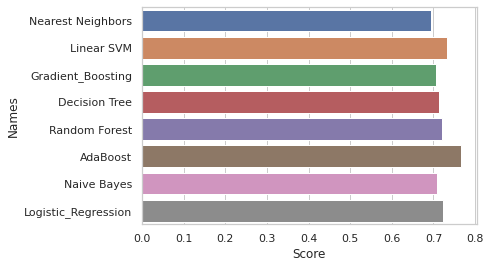

In [49]:
sns.set(style="whitegrid")
ax = sns.barplot(y ='Names',x = 'Score',data = df1)

In [53]:
classifier = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0, random_state=1)

In [54]:
classifier.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [55]:
y_pred = classifier.predict(x_test)

In [57]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc,confusion_matrix
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       408
           1       0.78      0.74      0.76       407

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815



In [58]:
c_m =confusion_matrix(y_test,y_pred)

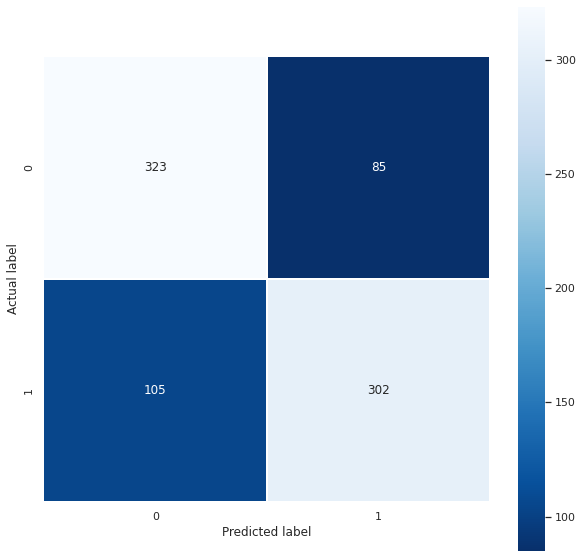

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(c_m, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [61]:
roc_auc_score(y_test,y_pred)

0.7668407043407044

In [62]:
fpr,tpr,threshold =roc_curve(y_test,y_pred)
auc = auc(fpr,tpr)

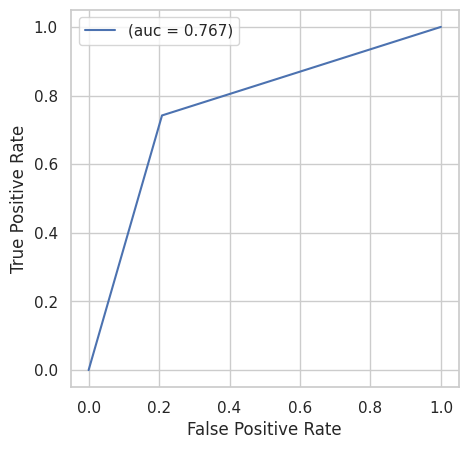

In [63]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Oversampling

In [64]:
count_class_0,count_class_1

(7963, 2037)

In [65]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0)
print("Random Over-Sampling")
print(df_test_over.Exited.value_counts())

Random Over-Sampling
1    7963
0    7963
Name: Exited, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


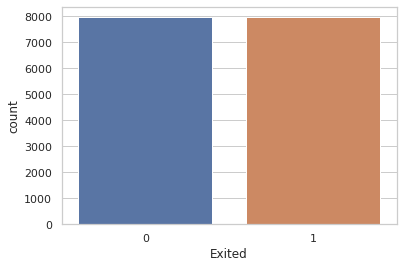

In [66]:
sns.countplot(df_test_over.Exited)

In [67]:
a1 = pd.get_dummies(df_test_over['Gender'])

In [68]:
b1 = pd.get_dummies(df_test_over['Geography'])

In [69]:
df_test_over= pd.concat([a1,b1,df_test_over],axis=1,join='inner')

In [70]:
df_test_over.drop(['Gender','RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [71]:
df_test_over.head()

,Female,Male,France,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1,0,0,0,1,608,41,1,83807.86,1,0,1,112542.58,0
3,1,0,1,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,1,0,0,0,1,850,43,2,125510.82,1,1,1,79084.10,0
6,0,1,1,0,0,822,50,7,0.00,2,1,1,10062.80,0
8,0,1,1,0,0,501,44,4,142051.07,2,0,1,74940.50,0


In [72]:
x = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123,stratify=y)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [76]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [77]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [78]:
scores

[0.8559322033898306,
 0.7175141242937854,
 0.8038292529817953,
 0.761142498430634,
 0.7426239799121155,
 0.7740112994350282,
 0.6942875078468299,
 0.7087256748273697]

In [79]:
df2 = pd.DataFrame()
df2['Names'] = names
df2['Score'] = scores
df2

,Names,Score
0,Nearest Neighbors,0.855932
1,Linear SVM,0.717514
2,Gradient_Boosting,0.803829
3,Decision Tree,0.761142
4,Random Forest,0.742624
5,AdaBoost,0.774011
6,Naive Bayes,0.694288
7,Logistic_Regression,0.708726


In [80]:
cm = sns.light_palette('green',as_cmap=True)
s = df2.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.855932
1,Linear SVM,0.717514
2,Gradient_Boosting,0.803829
3,Decision Tree,0.761142
4,Random Forest,0.742624
5,AdaBoost,0.774011
6,Naive Bayes,0.694288
7,Logistic_Regression,0.708726


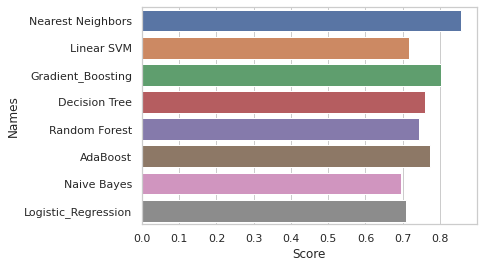

In [81]:
sns.set(style="whitegrid")
ax = sns.barplot(y ='Names',x = 'Score',data = df2)

In [98]:
classifier2 = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',metric = 'minkowski')

In [99]:
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [100]:
y_predicted = classifier2.predict(x_test)

In [101]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1593
           1       0.77      0.88      0.82      1593

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



In [102]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [104]:
c_m2 = confusion_matrix(y_test,y_predicted)

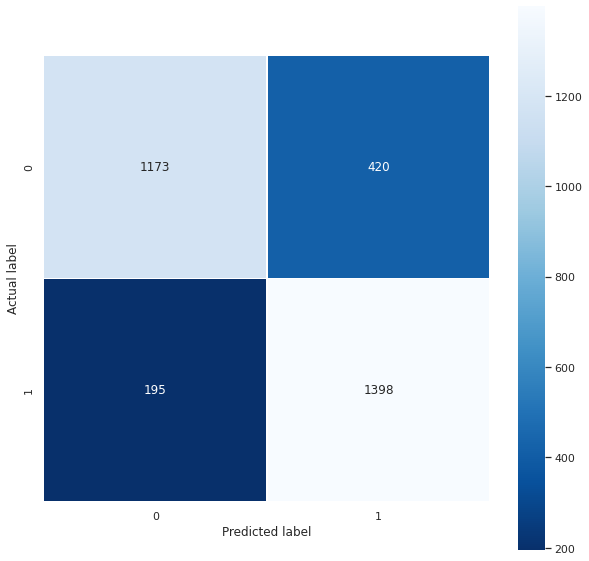

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(c_m2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [106]:
roc_auc_score(y_test,y_predicted)

0.8069679849340867

In [107]:
fpr,tpr,threshold =roc_curve(y_test,y_predicted)
auc = auc(fpr,tpr)

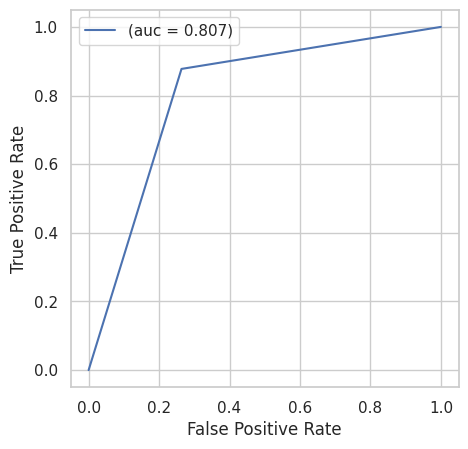

In [108]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()